In [7]:
# Define metric groups
GROUPS = {
    "location": [
        "acc_location_above",
        "acc_location_closer_to_camera",
        "acc_location_next_to"
    ],
    "height": [
        "acc_height_higher"
    ],
    "multi-object": [
        "acc_multi_object_closer_to",
        "acc_multi_object_parallel",
        "acc_multi_object_same_direction",
        "acc_multi_object_viewpoint_towards_object"
    ],
    "orientation": [
        "acc_orientation_viewpoint",
        "acc_orientation_on_the_left",
        "acc_orientation_in_front_of"
    ]
}

ALL_METRICS = [
    'overall_accuracy',
    'std_dev_accuracy',
    'acc_height_higher',
    'acc_location_above',
    'acc_location_closer_to_camera',
    'acc_location_next_to',
    'acc_multi_object_closer_to',
    'acc_multi_object_parallel',
    'acc_multi_object_same_direction',
    'acc_multi_object_viewpoint_towards_object',
    'acc_orientation_in_front_of',
    'acc_orientation_on_the_left',
    'acc_orientation_viewpoint'
]

In [8]:
import pandas as pd

files = [
    # "3DSRBench_raw_predictions_qwenvl2_5_3b_instruct_none_reasoning.csv",
    # "3DSRBench_raw_predictions_qwenvl2_5_3b_instruct_numerical.csv",
    # "3DSRBench_raw_predictions_qwenvl2_5_3b_instruct_visual.csv",
    # "3DSRBench_raw_predictions_qwenvl2_5_3b_instruct_none.csv",
    # "3DSRBench_raw_predictions_qwenvl2_5_3b_instruct_numerical_reasoning.csv",
    # "3DSRBench_raw_predictions_qwenvl2_5_3b_instruct_visual_reasoning.csv",
    # "3DSRBench_raw_predictions_qwenvl2_5_3b_instruct_numerical_react.csv"
    "3DSRBench_raw_predictions_grpo_trained_4b.csv"
    
]

output_files = [
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_none_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_visual.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_none.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_visual_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical_react.csv"
    "3DSRBench_metrics_grpo_trained_4b.csv"
    
]

for file, output_file in zip(files, output_files):
    df = pd.read_csv(file)

    metrics = {}

    # ---- Overall accuracy ----
    # print(df)
    metrics["overall_accuracy"] = df["is_correct"].mean()

    # # ---- Standard deviation of correctness (robustness) ----
    # metrics["std_dev_accuracy"] = df["is_correct"].std()

    # ---- Category-wise accuracy ----
    cat_acc = df.groupby("category")["is_correct"].mean().to_dict()
    for cat, acc in cat_acc.items():
        metrics[f"acc_{cat}"] = acc

    # ---- Parent category accuracy ----
    for parent, children in GROUPS.items():
        valid_child_metrics = []
        
        for metric_name in children:
            if metric_name in metrics:
                valid_child_metrics.append(metrics[metric_name])

        if len(valid_child_metrics) > 0:
            metrics[f"acc_group_{parent}"] = sum(valid_child_metrics) / len(valid_child_metrics)
        else:
            metrics[f"acc_group_{parent}"] = None  # or np.nan

    # =======================
    # Save results
    # =======================
    metrics_df = pd.DataFrame([metrics])
    metrics_df.to_csv(output_file, index=False)

    # print("\n✅ Evaluation Complete!")
    # print(metrics_df.T)

In [9]:
file_names = [
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_none_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_visual.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_none.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_visual_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical_react.csv"
    "3DSRBench_metrics_grpo_trained_4b.csv"
]
pds = [pd.read_csv(file) for file in file_names]
# Compute mean and standard deviation
mean_metrics = [pd.mean(numeric_only=True) for pd in pds]

summary = [pd.DataFrame({"mean": mean}) for mean in mean_metrics]

# summary = [pd.drop(pd.index[1]) for pd in summary]

In [10]:
# summary[0] = summary[0].drop(summary[0].index[0])
# summary[0] = summary[0].drop(summary[0].index[1])
# summary[3] = summary[3].drop(summary[3].index[0])
# summary[3] = summary[3].drop(summary[3].index[1])
summary

[                                               mean
 overall_accuracy                           0.461111
 acc_height_higher                          0.533333
 acc_location_above                         0.533333
 acc_location_closer_to_camera              0.333333
 acc_location_next_to                       0.666667
 acc_multi_object_closer_to                 0.600000
 acc_multi_object_facing                    0.466667
 acc_multi_object_parallel                  0.533333
 acc_multi_object_same_direction            0.666667
 acc_multi_object_viewpoint_towards_object  0.066667
 acc_orientation_in_front_of                0.466667
 acc_orientation_on_the_left                0.400000
 acc_orientation_viewpoint                  0.266667
 acc_group_location                         0.511111
 acc_group_height                           0.533333
 acc_group_multi-object                     0.466667
 acc_group_orientation                      0.377778]

In [11]:
formatted = [e.apply(lambda x: f"{x['mean']:.3f}", axis=1) for e in summary]
formatted

[overall_accuracy                             0.461
 acc_height_higher                            0.533
 acc_location_above                           0.533
 acc_location_closer_to_camera                0.333
 acc_location_next_to                         0.667
 acc_multi_object_closer_to                   0.600
 acc_multi_object_facing                      0.467
 acc_multi_object_parallel                    0.533
 acc_multi_object_same_direction              0.667
 acc_multi_object_viewpoint_towards_object    0.067
 acc_orientation_in_front_of                  0.467
 acc_orientation_on_the_left                  0.400
 acc_orientation_viewpoint                    0.267
 acc_group_location                           0.511
 acc_group_height                             0.533
 acc_group_multi-object                       0.467
 acc_group_orientation                        0.378
 dtype: object]

In [12]:
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_none_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_visual.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_none.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_visual_reasoning.csv",
    # "3DSRBench_metrics_qwenvl2_5_3b_instruct_numerical_react.csv"
table = pd.concat(formatted, axis=1)
table.columns = ['3B-None-Rea', '3B-Num', '3B-Vis', '3B-None', '3B-Num-Rea', '3B-Vis-Rea', '3B-Num-React']
print(table)

ValueError: Length mismatch: Expected axis has 1 elements, new values have 7 elements

In [ ]:
print(table.to_latex(column_format="lccccccc", header=True, escape=False))

\begin{tabular}{lccccccc}
\toprule
 & 3B-None-Rea & 3B-Num & 3B-Vis & 3B-None & 3B-Num-Rea & 3B-Vis-Rea & 3B-Num-React \\
\midrule
overall_accuracy & 0.460 & 0.473 & 0.380 & 0.540 & 0.427 & 0.400 & 0.447 \\
acc_orientation_in_front_of & 0.540 & 0.560 & 0.300 & 0.660 & 0.340 & 0.460 & 0.420 \\
acc_orientation_on_the_left & 0.480 & 0.500 & 0.560 & 0.520 & 0.480 & 0.420 & 0.560 \\
acc_orientation_viewpoint & 0.360 & 0.360 & 0.280 & 0.440 & 0.460 & 0.320 & 0.360 \\
acc_group_location & nan & nan & nan & nan & nan & nan & nan \\
acc_group_height & nan & nan & nan & nan & nan & nan & nan \\
acc_group_multi-object & nan & nan & nan & nan & nan & nan & nan \\
acc_group_orientation & 0.460 & 0.473 & 0.380 & 0.540 & 0.427 & 0.400 & 0.447 \\
\bottomrule
\end{tabular}



In [ ]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
files_3 = glob.glob("3DSRBench_metrics_summary_*_3b.csv")
files_7 = glob.glob("3DSRBench_metrics_summary_[0-5].csv")

In [ ]:
dfs_3 = [pd.read_csv(f) for f in files_3]
combined_3 = pd.concat(dfs_3, axis=0, ignore_index=True)
combined_3

ValueError: No objects to concatenate

In [ ]:
dfs_7 = [pd.read_csv(f) for f in files_7]
combined_7 = pd.concat(dfs_7, axis=0, ignore_index=True)
combined_7

,overall_accuracy,acc_height_higher,acc_location_above,acc_location_closer_to_camera,acc_location_next_to,acc_multi_object_closer_to,acc_multi_object_facing,acc_multi_object_parallel,acc_multi_object_same_direction,acc_multi_object_viewpoint_towards_object,acc_orientation_in_front_of,acc_orientation_on_the_left,acc_orientation_viewpoint
0,0.455556,0.4,0.733333,0.2,0.666667,0.333333,0.133333,0.6,0.666667,0.266667,0.666667,0.533333,0.266667
1,0.461111,0.4,0.733333,0.2,0.666667,0.400000,0.133333,0.6,0.666667,0.266667,0.666667,0.533333,0.266667
2,0.461111,0.4,0.733333,0.2,0.666667,0.400000,0.133333,0.6,0.666667,0.266667,0.666667,0.533333,0.266667
3,0.461111,0.4,0.733333,0.2,0.666667,0.400000,0.133333,0.6,0.666667,0.266667,0.666667,0.533333,0.266667
4,0.455556,0.4,0.733333,0.2,0.666667,0.333333,0.133333,0.6,0.666667,0.266667,0.666667,0.533333,0.266667


In [ ]:
# Compute mean and standard deviation
mean_metrics_3 = combined_3.mean(numeric_only=True)
std_metrics_3 = combined_3.xi(numeric_only=True)
summary_3 = pd.DataFrame({"mean": mean_metrics_3, "std": std_metrics_3})
# remove the second row
summary_3 = summary_3.drop(summary_3.index[1])
print(summary_3)

NameError: name 'std_metrics_3' is not defined

In [ ]:
# Compute mean and standard deviation
mean_metrics_7 = combined_7.mean(numeric_only=True)
std_metrics_7 = combined_7.std(numeric_only=True)
summary_7 = pd.DataFrame({"mean": mean_metrics_7, "std": std_metrics_7})
# remove the second row
# summary_7 = summary_7.drop(summary_7.index[1])
print(summary_7)

                                               mean       std
overall_accuracy                           0.458889  0.003043
acc_height_higher                          0.400000  0.000000
acc_location_above                         0.733333  0.000000
acc_location_closer_to_camera              0.200000  0.000000
acc_location_next_to                       0.666667  0.000000
acc_multi_object_closer_to                 0.373333  0.036515
acc_multi_object_facing                    0.133333  0.000000
acc_multi_object_parallel                  0.600000  0.000000
acc_multi_object_same_direction            0.666667  0.000000
acc_multi_object_viewpoint_towards_object  0.266667  0.000000
acc_orientation_in_front_of                0.666667  0.000000
acc_orientation_on_the_left                0.533333  0.000000
acc_orientation_viewpoint                  0.266667  0.000000


In [ ]:
formatted_7 = summary_7.apply(lambda x: f"{x['mean']:.3f} (± {x['std']:.3f})", axis=1)
formatted_3 = summary_3.apply(lambda x: f"{x['mean']:.3f} (± {x['std']:.3f})", axis=1)
formatted_7

overall_accuracy                             0.459 (± 0.003)
acc_height_higher                            0.400 (± 0.000)
acc_location_above                           0.733 (± 0.000)
acc_location_closer_to_camera                0.200 (± 0.000)
acc_location_next_to                         0.667 (± 0.000)
acc_multi_object_closer_to                   0.373 (± 0.037)
acc_multi_object_facing                      0.133 (± 0.000)
acc_multi_object_parallel                    0.600 (± 0.000)
acc_multi_object_same_direction              0.667 (± 0.000)
acc_multi_object_viewpoint_towards_object    0.267 (± 0.000)
acc_orientation_in_front_of                  0.667 (± 0.000)
acc_orientation_on_the_left                  0.533 (± 0.000)
acc_orientation_viewpoint                    0.267 (± 0.000)
dtype: object

In [ ]:
table = pd.concat([formatted_7, formatted_3], axis=1)
table.columns = ['Qwen2.5-VL-7B-Instruct', 'Qwen2.5-VL-3B-Instruct']
print(table)

                                          Qwen2.5-VL-7B-Instruct  \
overall_accuracy                                 0.459 (± 0.003)   
acc_height_higher                                0.400 (± 0.000)   
acc_location_above                               0.733 (± 0.000)   
acc_location_closer_to_camera                    0.200 (± 0.000)   
acc_location_next_to                             0.667 (± 0.000)   
acc_multi_object_closer_to                       0.373 (± 0.037)   
acc_multi_object_facing                          0.133 (± 0.000)   
acc_multi_object_parallel                        0.600 (± 0.000)   
acc_multi_object_same_direction                  0.667 (± 0.000)   
acc_multi_object_viewpoint_towards_object        0.267 (± 0.000)   
acc_orientation_in_front_of                      0.667 (± 0.000)   
acc_orientation_on_the_left                      0.533 (± 0.000)   
acc_orientation_viewpoint                        0.267 (± 0.000)   

                                          Qwen2

In [ ]:
print(table.to_latex(column_format="l c", header=True, escape=False))

\begin{tabular}{l c}
\toprule
 & Qwen2.5-VL-7B-Instruct & Qwen2.5-VL-3B-Instruct \\
\midrule
overall_accuracy & 0.459 (± 0.003) & 0.357 (± 0.005) \\
acc_height_higher & 0.400 (± 0.000) & 0.533 (± 0.000) \\
acc_location_above & 0.733 (± 0.000) & 0.387 (± 0.030) \\
acc_location_closer_to_camera & 0.200 (± 0.000) & 0.467 (± 0.000) \\
acc_location_next_to & 0.667 (± 0.000) & 0.000 (± 0.000) \\
acc_multi_object_closer_to & 0.373 (± 0.037) & 0.467 (± 0.000) \\
acc_multi_object_facing & 0.133 (± 0.000) & 0.133 (± 0.000) \\
acc_multi_object_parallel & 0.600 (± 0.000) & 0.493 (± 0.037) \\
acc_multi_object_same_direction & 0.667 (± 0.000) & 0.067 (± 0.000) \\
acc_multi_object_viewpoint_towards_object & 0.267 (± 0.000) & 0.267 (± 0.000) \\
acc_orientation_in_front_of & 0.667 (± 0.000) & 0.533 (± 0.000) \\
acc_orientation_on_the_left & 0.533 (± 0.000) & 0.600 (± 0.000) \\
acc_orientation_viewpoint & 0.267 (± 0.000) & 0.333 (± 0.000) \\
\bottomrule
\end{tabular}



In [ ]:
groups = {
    "location": [
        "acc_location_above",
        "acc_location_closer_to_camera",
        "acc_location_next_to"
    ],
    "height": [
        "acc_height_higher"
    ],
    "multi-object": [
        "acc_multi_object_closer_to",
        "acc_multi_object_parallel",
        "acc_multi_object_same_direction",
        "acc_multi_object_viewpoint_towards_object"
    ],
    "orientation": [
        "acc_orientation_viewpoint",
        "acc_orientation_on_the_left",
        "acc_orientation_in_front_of"
    ]
}

In [ ]:
group_results_3 = {}
for group, metrics in groups.items():
    subset = summary_3.loc[metrics]
    # print(subset)
    group_mean = subset["mean"].mean()
    group_std = subset["mean"].std()  # std over means across metrics
    group_results_3[group] = [group_mean, group_std]

# Add overall accuracy for completeness
group_results_3["overall_accuracy"] = [
    summary_3.loc["overall_accuracy", "mean"],
    summary_3.loc["overall_accuracy", "std"]
]


In [ ]:
group_results_3

{'location': [0.28444444444444444, 0.24956258029095924],
 'height': [0.5333333333333333, nan],
 'multi-object': [0.3233333333333333, 0.19877402021167437],
 'orientation': [0.48888888888888893, 0.13877773329774218],
 'overall_accuracy': [0.35666666666666663, 0.004648111258522652]}

In [ ]:
group_results_7 = {}
for group, metrics in groups.items():
    subset = summary_7.loc[metrics]
    # print(subset)
    group_mean = subset["mean"].mean()
    group_std = subset["mean"].std()  # std over means across metrics
    group_results_7[group] = [group_mean, group_std]

# Add overall accuracy for completeness
group_results_7["overall_accuracy"] = [
    summary_7.loc["overall_accuracy", "mean"],
    summary_7.loc["overall_accuracy", "std"]
]


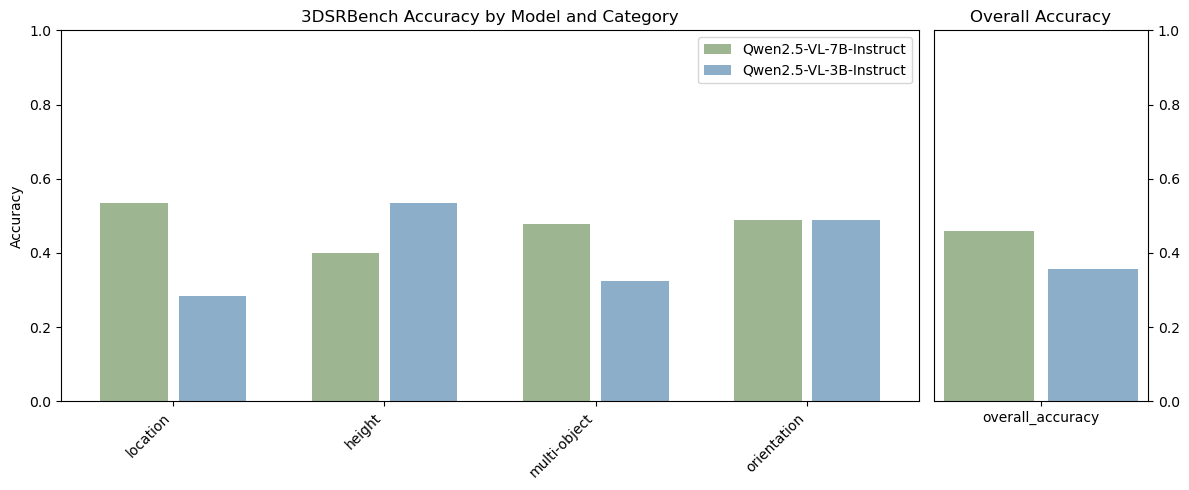

In [ ]:

labels = list(group_results_7.keys())
labels_main = labels[:-1]  # all except overall
labels_overall = [labels[-1]]  # only overall accuracy

accuracy_7_main = [group_results_7[label][0] for label in labels_main]
accuracy_3_main = [group_results_3[label][0] for label in labels_main]
accuracy_7_overall = [group_results_7[labels[-1]][0]]
accuracy_3_overall = [group_results_3[labels[-1]][0]]

# --- Main grouped bar plot ---
x = np.arange(len(labels_main))
width = 0.32  # slightly smaller width
gap = 0.05    # small horizontal gap between bar pairs

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), gridspec_kw={'width_ratios': [4, 1]})

# Left plot: category-wise accuracies
ax1.bar(x - width/2 - gap/2, accuracy_7_main, width, label='Qwen2.5-VL-7B-Instruct', color='#9db691')
ax1.bar(x + width/2 + gap/2, accuracy_3_main, width, label='Qwen2.5-VL-3B-Instruct', color='#8daec8')

ax1.set_ylabel('Accuracy')
ax1.set_title('3DSRBench Accuracy by Model and Category')
ax1.set_xticks(x)
ax1.set_xticklabels(labels_main, rotation=45, ha='right')
ax1.legend()
ax1.set_ylim(0, 1)


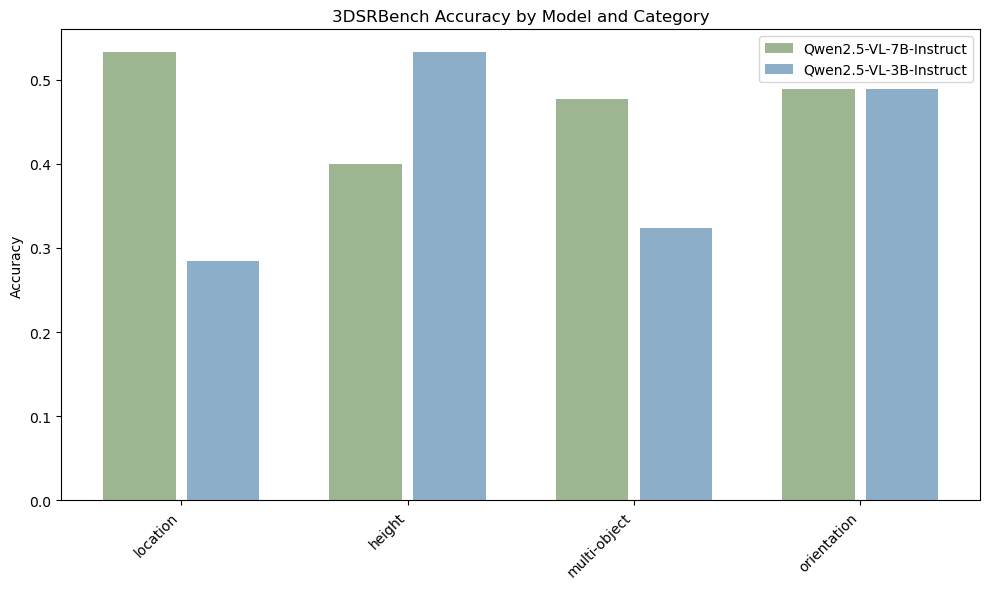

In [ ]:
labels = list(group_results_7.keys())
labels_main = labels[:-1]  # all except overall
labels_overall = [labels[-1]]  # only overall accuracy

accuracy_7_main = [group_results_7[label][0] for label in labels_main]
accuracy_3_main = [group_results_3[label][0] for label in labels_main]
accuracy_7_overall = [group_results_7[labels[-1]][0]]
accuracy_3_overall = [group_results_3[labels[-1]][0]]

# --- 1️⃣ Category-wise accuracy plot ---
x = np.arange(len(labels_main))
width = 0.32
gap = 0.05

fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width/2 - gap/2, accuracy_7_main, width, 
       label='Qwen2.5-VL-7B-Instruct', color='#9db691')
ax.bar(x + width/2 + gap/2, accuracy_3_main, width, 
       label='Qwen2.5-VL-3B-Instruct', color='#8daec8')

ax.set_ylabel('Accuracy')
ax.set_title('3DSRBench Accuracy by Model and Category')
ax.set_xticks(x)
ax.set_xticklabels(labels_main, rotation=45, ha='right')
ax.legend()
plt.tight_layout()
plt.show()



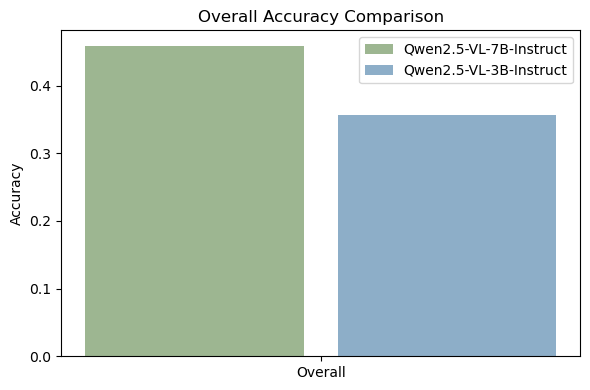

In [ ]:
# --- 2️⃣ Overall accuracy plot ---
x_overall = np.arange(len(labels_overall))
fig, ax = plt.subplots(figsize=(6, 4))

ax.bar(x_overall - width/2 - gap/2, accuracy_7_overall, width, 
       label='Qwen2.5-VL-7B-Instruct', color='#9db691')
ax.bar(x_overall + width/2 + gap/2, accuracy_3_overall, width, 
       label='Qwen2.5-VL-3B-Instruct', color='#8daec8')

ax.set_ylabel('Accuracy')
ax.set_title('Overall Accuracy Comparison')
ax.set_xticks(x_overall)
ax.set_xticklabels(['Overall'])
ax.legend()
plt.tight_layout()
plt.show()

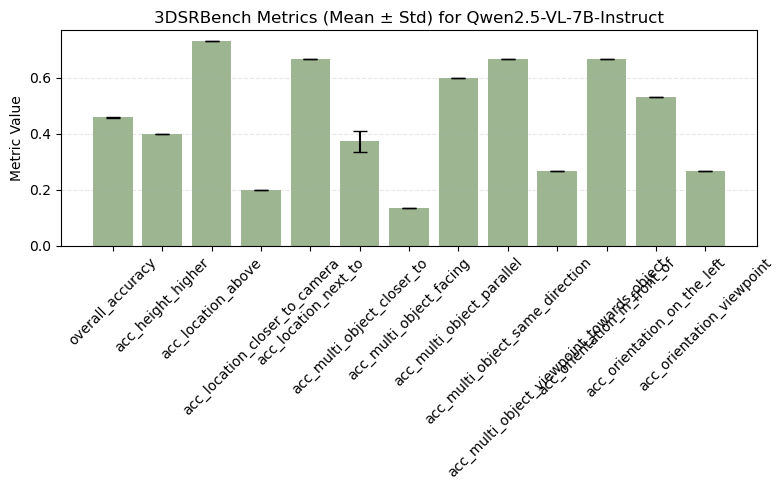

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(summary_7.index, summary_7["mean"], yerr=summary_7["std"], capsize=5, color="#9db691")
plt.ylabel("Metric Value")
plt.title("3DSRBench Metrics (Mean ± Std) for Qwen2.5-VL-7B-Instruct")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

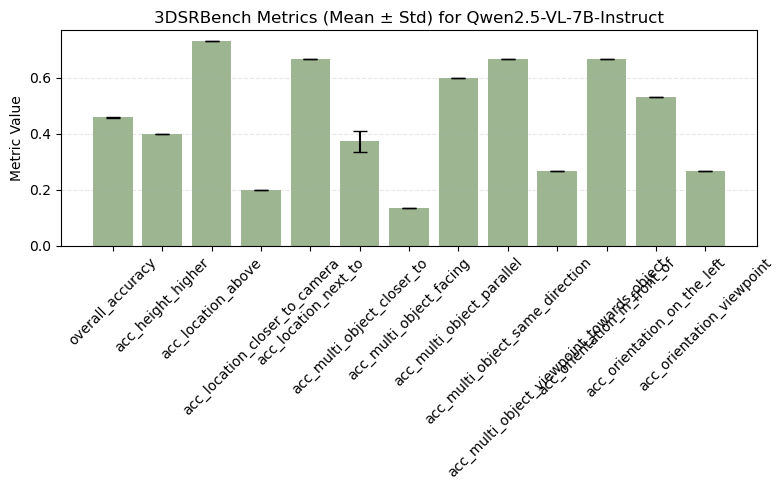

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(summary_7.index, summary_7["mean"], yerr=summary_7["std"], capsize=5, color="#9db691")
plt.ylabel("Metric Value")
plt.title("3DSRBench Metrics (Mean ± Std) for Qwen2.5-VL-7B-Instruct")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()